<a href="https://colab.research.google.com/github/kgudalewski/Stocks_analysis/blob/main/AAPL_stock_brief_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [76]:
# !pip install yfinance==0.2.52
import yfinance as yf
import pandas as pd
import datetime
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import root_mean_squared_error, mean_squared_error

# eda

In [77]:
ticker = "AAPL"
start_date = "2020-01-01"
end_date = "2024-12-31"
# start_date = (datetime.datetime.now() - datetime.timedelta(days=4*365)).strftime("%Y-%m-%d")
# end_date = (datetime.datetime.now()).strftime("%Y-%m-%d")
data = yf.download(ticker, start=start_date, end=end_date)
data = data.droplevel(1,axis=1)

[*********************100%***********************]  1 of 1 completed


In [78]:
data.head()

Price,Close,High,Low,Open,Volume
Date,,,,,
2020-01-02,72.716072,72.776598,71.466812,71.721019,135480400
2020-01-03,72.009140,72.771768,71.783985,71.941351,146322800
2020-01-06,72.582901,72.621639,70.876068,71.127858,118387200
2020-01-07,72.241531,72.849208,72.021215,72.592578,108872000
2020-01-08,73.403656,73.706287,71.943766,71.943766,132079200


In [79]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1257 entries, 2020-01-02 to 2024-12-30
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   1257 non-null   float64
 1   High    1257 non-null   float64
 2   Low     1257 non-null   float64
 3   Open    1257 non-null   float64
 4   Volume  1257 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 58.9 KB


In [80]:
data.describe()

Price,Close,High,Low,Open,Volume
count,1257.000000,1257.000000,1257.000000,1257.000000,1.257000e+03
mean,152.099694,153.628459,150.393243,151.942834,9.061449e+07
std,41.998935,42.137927,41.773141,41.938210,5.325627e+07
min,54.449894,55.452160,51.595990,55.350235,2.323470e+07
25%,126.916969,128.007157,124.891203,126.388685,5.546960e+07
50%,150.734467,152.492142,148.730096,150.559474,7.629970e+07
75%,176.675095,178.382589,175.237284,176.521213,1.077601e+08
max,258.735504,259.814335,257.347047,257.906429,4.265100e+08


In [81]:
data['Daily_Return'] = data['Close'].pct_change()
data['Rolling_Mean'] = data['Close'].rolling(window=20).mean()
data['Volatility'] = data['Daily_Return'].rolling(window=20).std()
data["Week"] = [pd.to_datetime(date).week for date in data.index]
data["Year"] = [pd.to_datetime(date).year for date in data.index]

def fix_weeks(row):
  if pd.to_datetime(row.name).month == 12 and row.Week == 1:
    return 52
  else:
    return row.Week

data['Week'] = data.apply(fix_weeks, axis=1)


In [82]:
filtered_data = data[data['Daily_Return'] > 0.02]
filtered_data.head()

Price,Close,High,Low,Open,Volume,Daily_Return,Rolling_Mean,Volatility,Week,Year
Date,,,,,,,,,,
2020-01-09,74.962814,75.156495,74.132398,74.384181,170108400,0.021241,NaN,NaN,2.0,2020
2020-01-13,76.737411,76.764047,75.330785,75.449422,121532000,0.021364,NaN,NaN,3.0,2020
2020-01-28,76.914169,77.086061,75.582595,75.681858,162234000,0.028290,NaN,NaN,5.0,2020
2020-01-29,78.524139,79.373928,77.807512,78.550775,216229200,0.020932,NaN,NaN,5.0,2020
2020-02-04,77.195015,77.386280,75.931229,76.337963,136616400,0.033014,76.02285,0.018808,6.0,2020


In [83]:
def range_fn(x):
    return x.max() - x.min()

aggregated_df = data.groupby(['Year','Week'])['Close'].agg(['mean', 'min', 'max', range_fn])
aggregated_df.head()

mean        min        max  range_fn
Year Week                                           
2020 1.0   72.362606  72.009140  72.716072  0.706932
     2.0   73.664632  72.241531  75.132256  2.890724
     3.0   76.260472  75.376785  77.165962  1.789177
     4.0   76.977707  76.643013  77.286995  0.643982
     5.0   76.716113  74.798164  78.524139  3.725975

In [84]:
data.loc[((data.Year == 2024) & (data.Week == 1)) | ((data.Year == 2024) & (data.Week == 52))]
# check whether bad week description appears

Price,Close,High,Low,Open,Volume,Daily_Return,Rolling_Mean,Volatility,Week,Year
Date,,,,,,,,,,
2024-01-02,184.532089,187.315382,182.792533,186.033072,82488700,-0.035787,192.870528,0.012075,1.0,2024
2024-01-03,183.150375,184.770652,182.335262,183.120556,58414500,-0.007488,192.613074,0.012014,1.0,2024
2024-01-04,180.824356,181.997307,179.800504,181.062914,71983600,-0.012700,192.041009,0.011036,1.0,2024
2024-01-05,180.098679,181.669251,179.094712,180.903857,62303300,-0.004013,191.487332,0.011021,1.0,2024
2024-12-23,254.989655,255.369227,253.171646,254.490204,40858800,0.003065,244.757892,0.008893,52.0,2024
2024-12-24,257.916443,257.926411,255.009620,255.209412,23234700,0.011478,246.023002,0.008828,52.0,2024
2024-12-26,258.735504,259.814335,257.347047,257.906429,27237100,0.003176,247.219685,0.008782,52.0,2024
2024-12-27,255.309296,258.415896,252.782075,257.546826,42355300,-0.013242,248.251551,0.009615,52.0,2024
2024-12-30,251.923019,253.221595,250.474615,251.952985,35557500,-0.013263,248.994234,0.010262,52.0,2024


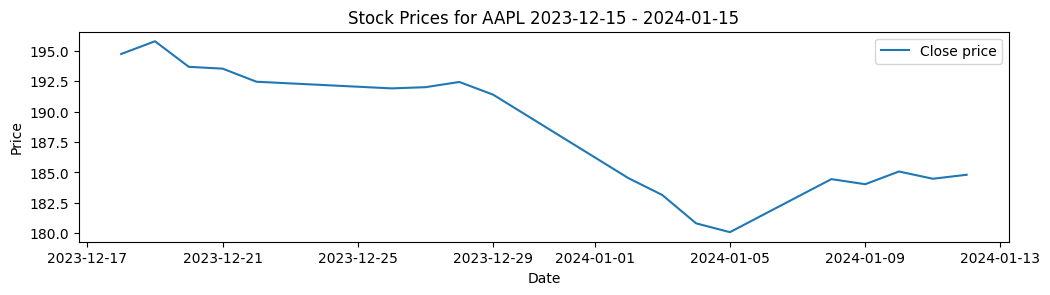

In [85]:
plt.figure(figsize=(12, 6))

# Plot Adjusted Close price
plt.subplot(2, 1, 1)  # 2 rows, 1 column, first subplot
plt.plot(data.loc[(data.index < '2024-01-15') & (data.index > '2023-12-15')]['Close'], label='Close price')
plt.title(f'Stock Prices for {ticker} 2023-12-15 - 2024-01-15')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()


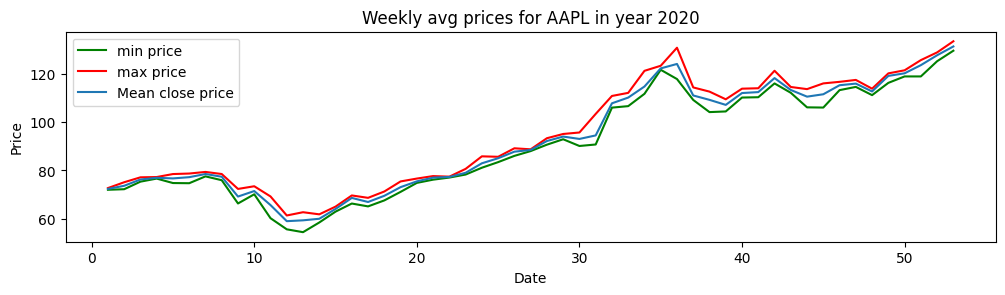

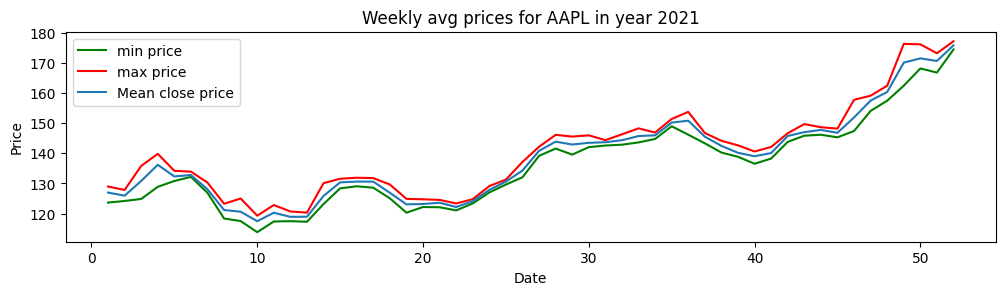

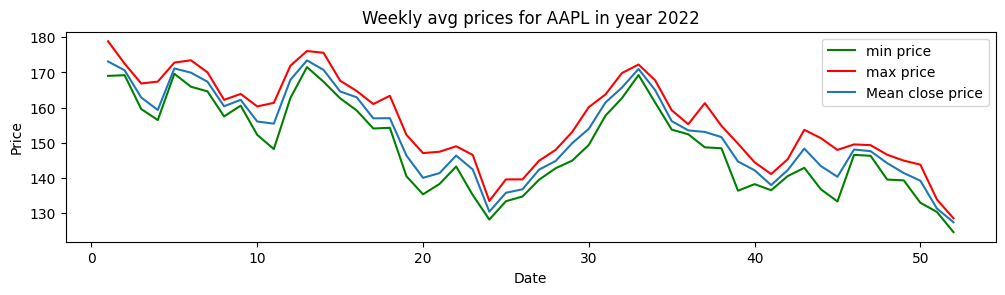

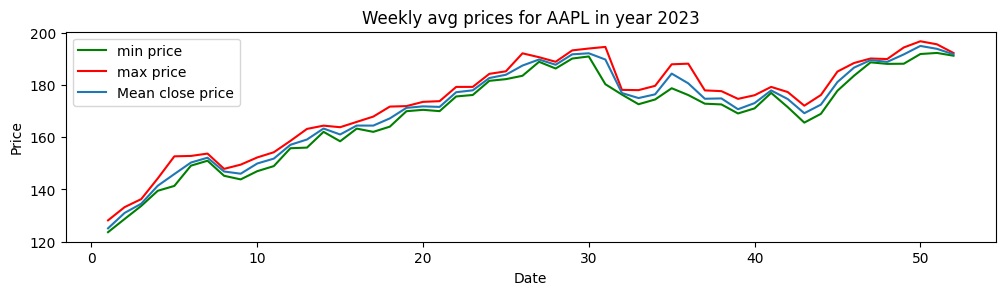

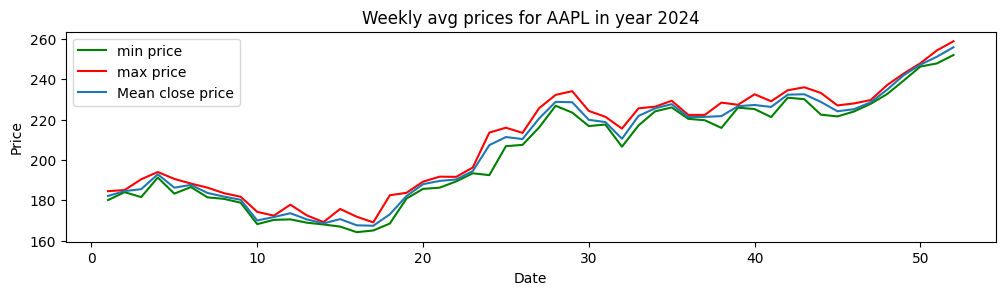

In [86]:
for year in aggregated_df.index.get_level_values('Year').unique():

  year_data = aggregated_df.loc[year]
  # Plot Adjusted Close price
  plt.figure(figsize=(12, 6))
  plt.subplot(2, 1, 1)  # 2 rows, 1 column, first subplot
  plt.plot(year_data['min'], label='min price', color='green')
  plt.plot(year_data['max'], label='max price', color='red')
  plt.plot(year_data['mean'], label='Mean close price')
  plt.title(f'Weekly avg prices for {ticker} in year {year}')
  plt.xlabel('Date')
  plt.ylabel('Price')
  plt.legend()
  plt.show()

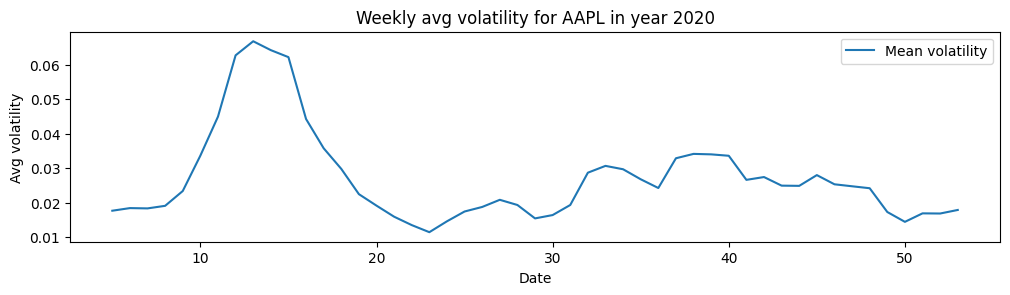

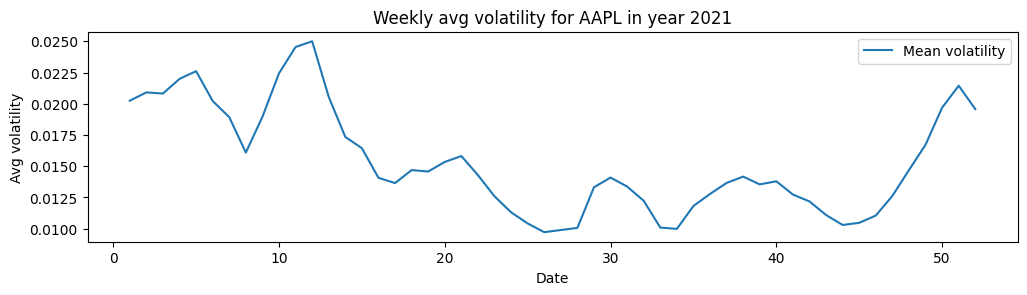

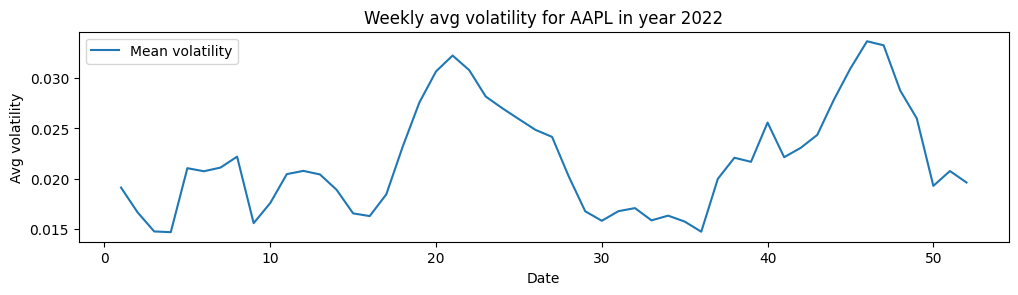

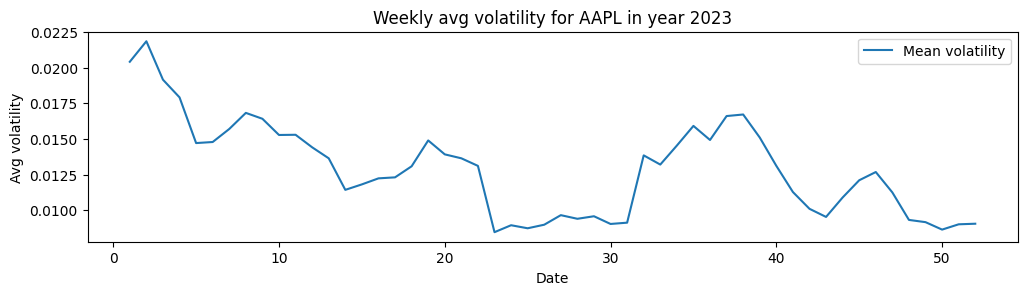

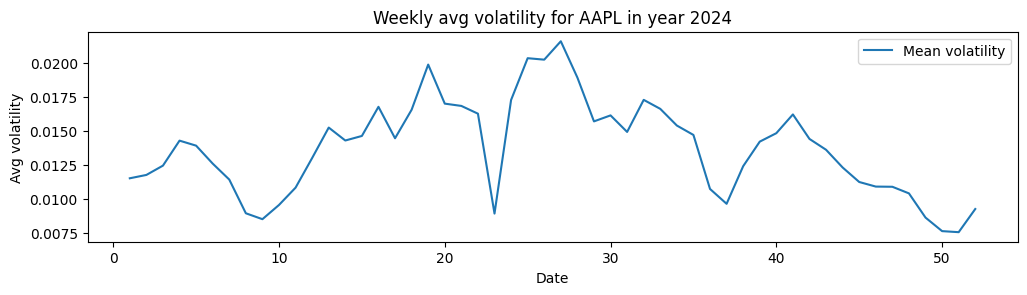

In [87]:
volatility_df = data.groupby(['Year','Week'])['Volatility'].agg(['mean'])

for year in volatility_df.index.get_level_values('Year').unique():

  year_data = volatility_df.loc[year]
  # Plot Adjusted Close price
  plt.figure(figsize=(12, 6))
  plt.subplot(2, 1, 1)  # 2 rows, 1 column, first subplot
  plt.plot(year_data['mean'], label='Mean volatility')
  plt.title(f'Weekly avg volatility for {ticker} in year {year}')
  plt.xlabel('Date')
  plt.ylabel('Avg volatility')
  plt.legend()
  plt.show()

In [88]:
aggregated_df.groupby(['Year',"Week"])["range_fn"].mean().sort_values(ascending=False).unstack(level='Year')

Year,2020,2021,2022,2023,2024
Week,,,,,
1.0,0.706932,5.323456,9.837845,4.547104,4.433411
2.0,2.890724,3.662903,3.282578,4.557007,1.043716
3.0,1.789177,10.979050,7.262909,2.629425,8.827011
4.0,0.643982,10.939957,10.918961,4.764587,2.743530
5.0,3.725975,3.369888,3.174835,11.367813,7.286255
6.0,4.006813,1.741333,7.518173,3.736542,1.719681
7.0,1.841942,3.404266,5.402451,2.752243,4.817245
8.0,2.565117,4.900978,4.703781,2.663147,2.796783
9.0,6.023293,7.493324,3.335892,5.662872,2.956039


In [89]:
agg_vol_df = volatility_df.groupby(['Year',"Week"])['mean'].mean().sort_values(ascending=False).unstack(level='Year')
agg_vol_df["std_dev_per_week"] = (agg_vol_df.std(axis=1) / agg_vol_df.mean(axis=1)) * 100
# agg_vol_df.sort_values(by="std_dev_per_week", ascending=True, inplace=True)
agg_vol_df.head()

Year,2020,2021,2022,2023,2024,std_dev_per_week
Week,,,,,,
1.0,NaN,0.020250,0.019110,0.020416,0.011536,23.751607
2.0,NaN,0.020912,0.016638,0.021854,0.011782,25.888142
3.0,NaN,0.020821,0.014741,0.019160,0.012468,22.991309
4.0,NaN,0.021996,0.014668,0.017919,0.014306,20.746964
5.0,0.017679,0.022612,0.021043,0.014715,0.013937,21.146418


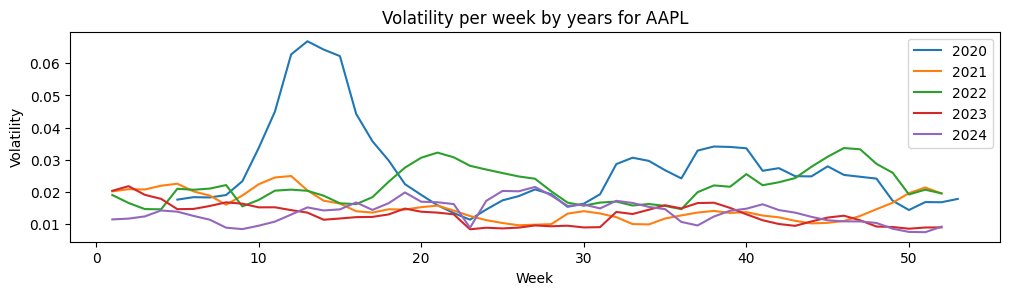

In [90]:
# to check if there's any repeatable pattern over years

plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)  # 2 rows, 1 column, first subplot

for year in agg_vol_df.columns[:-1].to_list():
  plt.plot(agg_vol_df[year], label=str(year))

plt.title(f'Volatility per week by years for {ticker}')
plt.xlabel('Week')
plt.ylabel('Volatility')
plt.legend()
plt.show()


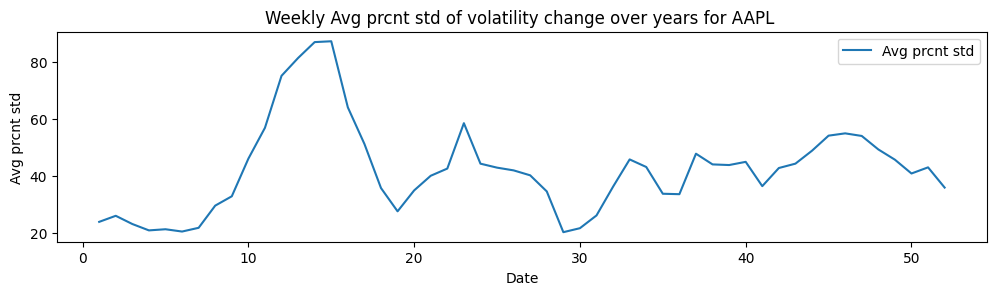

In [91]:
# to check if there's any repeatable pattern over years

plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)  # 2 rows, 1 column, first subplot
plt.plot(agg_vol_df['std_dev_per_week'], label='Avg prcnt std')
plt.title(f'Weekly Avg prcnt std of volatility change over years for {ticker} ')
plt.xlabel('Date')
plt.ylabel('Avg prcnt std')
plt.legend()
plt.show()

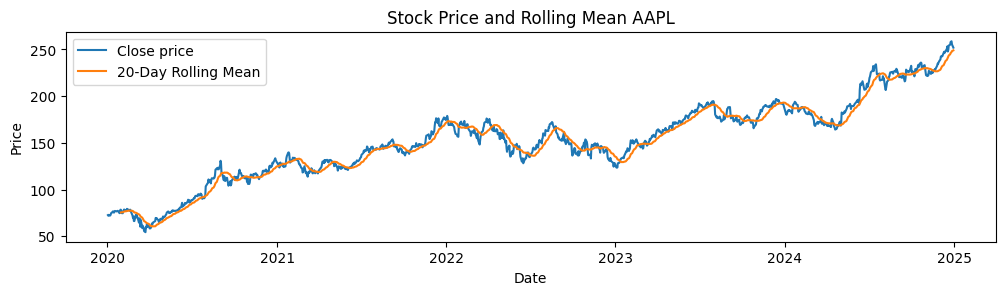

In [92]:
plt.figure(figsize=(12, 6))

# Plot Adjusted Close price
plt.subplot(2, 1, 1)  # 2 rows, 1 column, first subplot
plt.plot(data['Close'], label='Close price')
plt.plot(data['Rolling_Mean'], label='20-Day Rolling Mean')
plt.title(f'Stock Price and Rolling Mean {ticker}')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()

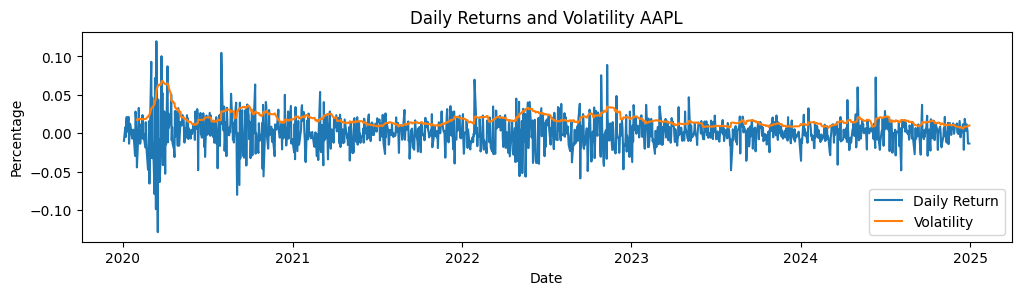

In [93]:
plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 2)  # 2 rows, 1 column, second subplot
plt.plot(data['Daily_Return'], label='Daily Return')
plt.plot(data['Volatility'], label='Volatility')
plt.title(f'Daily Returns and Volatility {ticker}')
plt.xlabel('Date')
plt.ylabel('Percentage')
plt.legend()

# predictions

In [94]:
data.head()

Price,Close,High,Low,Open,Volume,Daily_Return,Rolling_Mean,Volatility,Week,Year
Date,,,,,,,,,,
2020-01-02,72.716072,72.776598,71.466812,71.721019,135480400,NaN,NaN,NaN,1.0,2020
2020-01-03,72.009140,72.771768,71.783985,71.941351,146322800,-0.009722,NaN,NaN,1.0,2020
2020-01-06,72.582901,72.621639,70.876068,71.127858,118387200,0.007968,NaN,NaN,2.0,2020
2020-01-07,72.241531,72.849208,72.021215,72.592578,108872000,-0.004703,NaN,NaN,2.0,2020
2020-01-08,73.403656,73.706287,71.943766,71.943766,132079200,0.016087,NaN,NaN,2.0,2020


In [95]:
# predictions of future close price based on previous row/rows
data['Future_Close'] = data['Close'].shift(-1)

data = data.dropna() # drop last row with nan value

X = data[['Close',"High",'Low', 'Open', 'Rolling_Mean']]
y = data['Future_Close']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'SVR': SVR(),
    'KNN': KNeighborsRegressor(),
    'Gradient Boosting': GradientBoostingRegressor()
}

for model_name, model in models.items():
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    mse = mean_squared_error(y_test, predictions)
    rmse = root_mean_squared_error(y_test, predictions)
    print(f"{model_name}: MSE = {mse} & RMSE = {rmse}")

Linear Regression: MSE = 6.532450690347725 & RMSE = 2.5558659374755406
Decision Tree: MSE = 14.72397577829302 & RMSE = 3.8371833130947786
Random Forest: MSE = 7.963739662280721 & RMSE = 2.8220098621870053
SVR: MSE = 56.26477608284299 & RMSE = 7.5009850075068805
KNN: MSE = 8.383547345017616 & RMSE = 2.8954356053999226
Gradient Boosting: MSE = 7.618425266101007 & RMSE = 2.7601495006794483


In [96]:
# for ['Close',"High",'Low', 'Open', "Rolling_Mean", 'Volatility']
# Linear Regression: MSE = 6.450623979174821 & RMSE = 2.539807862649224
# Decision Tree: MSE = 11.406443704864163 & RMSE = 3.377342698759509
# Random Forest: MSE = 7.50141512215098 & RMSE = 2.7388711401142953
# SVR: MSE = 35.99706517544796 & RMSE = 5.999755426302639
# KNN: MSE = 8.070126913352711 & RMSE = 2.8407968799885555
# Gradient Boosting: MSE = 7.503122260259372 & RMSE = 2.739182772335459

# for ['Close',"High",'Low', 'Open', "Rolling_Mean"]
# Linear Regression: MSE = 5.660413135516561 & RMSE = 2.3791622759947586
# Decision Tree: MSE = 12.350181347742579 & RMSE = 3.5142824797876706
# Random Forest: MSE = 6.455012268208142 & RMSE = 2.540671617546853
# SVR: MSE = 50.82316179832419 & RMSE = 7.129036526651003
# KNN: MSE = 6.767069397949932 & RMSE = 2.6013591443608726
# Gradient Boosting: MSE = 6.563887963072319 & RMSE = 2.5620085798202004

# for ['Close',"High",'Low', 'Open']
# Linear Regression: MSE = 7.709232421009728 & RMSE = 2.7765504535321752
# Decision Tree: MSE = 15.718372212083027 & RMSE = 3.9646402374090677
# Random Forest: MSE = 9.287981251384961 & RMSE = 3.0476189478648674
# SVR: MSE = 31.05113038474394 & RMSE = 5.572354115160301
# KNN: MSE = 9.266384821700651 & RMSE = 3.0440737214628446
# Gradient Boosting: MSE = 9.274822851337037 & RMSE = 3.045459382644437

# but the key factor is whether prediction is in valid way compared to previous close price
# (to check if model predict valid direction of stock price)

In [97]:
def prcnt_crrct_dir_guesses(X, y, pred_y):
  def correct_direction(row):
    # checks if predctions are the same way that actual price
    start_close = row['Close']
    if (row['Actual_future_Close'] > start_close) & (row['Predicted_future_Close'] > start_close) :
      return 1
    elif (row['Actual_future_Close'] < start_close) & (row['Predicted_future_Close'] < start_close) :
      return 1
    else:
      return 0


  validation_df = X.copy()
  validation_df['Actual_future_Close'] = y
  validation_df['Predicted_future_Close'] = pred_y
  validation_df['Correct_direction'] = validation_df.apply(correct_direction, axis=1)

  return (validation_df['Correct_direction'].sum() / len(validation_df)) * 100

In [98]:
# predictions of future close price based on previous row/rows
data['Future_Close'] = data['Close'].shift(-1)

data = data.dropna() # drop last row with nan value

X = data[['Close',"High",'Low', 'Open', 'Rolling_Mean']]
y = data['Future_Close']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'SVR': SVR(),
    'KNN': KNeighborsRegressor(),
    'Gradient Boosting': GradientBoostingRegressor()
}

for model_name, model in models.items():
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    mse = mean_squared_error(y_test, predictions)
    rmse = root_mean_squared_error(y_test, predictions)
    dirs_e = prcnt_crrct_dir_guesses(X_test, y_test, predictions)
    print(f"{model_name}: MSE = {mse} | RMSE = {rmse} | PRCNT of correctly guessed directions = {dirs_e}")

Linear Regression: MSE = 7.9273960476556 | RMSE = 2.815563184809675 | PRCNT of correctly guessed directions = 50.607287449392715
Decision Tree: MSE = 14.451735380759096 | RMSE = 3.8015438154464425 | PRCNT of correctly guessed directions = 43.31983805668016
Random Forest: MSE = 9.018227528005548 | RMSE = 3.0030363847288877 | PRCNT of correctly guessed directions = 49.392712550607285
SVR: MSE = 61.92042622679154 | RMSE = 7.868953312022606 | PRCNT of correctly guessed directions = 51.012145748987855
KNN: MSE = 9.158726537621325 | RMSE = 3.0263388008650525 | PRCNT of correctly guessed directions = 53.441295546558706
Gradient Boosting: MSE = 8.888417170849477 | RMSE = 2.981344859429965 | PRCNT of correctly guessed directions = 51.417004048582996


In [ ]:
# for ['Close',"High",'Low', 'Open', 'Rolling_Mean']
# Linear Regression: MSE = 7.9273960476556 | RMSE = 2.815563184809675 | PRCNT of correctly guessed directions = 50.607287449392715
# Decision Tree: MSE = 14.451735380759096 | RMSE = 3.8015438154464425 | PRCNT of correctly guessed directions = 43.31983805668016
# Random Forest: MSE = 9.018227528005548 | RMSE = 3.0030363847288877 | PRCNT of correctly guessed directions = 49.392712550607285
# SVR: MSE = 61.92042622679154 | RMSE = 7.868953312022606 | PRCNT of correctly guessed directions = 51.012145748987855
# KNN: MSE = 9.158726537621325 | RMSE = 3.0263388008650525 | PRCNT of correctly guessed directions = 53.441295546558706
# Gradient Boosting: MSE = 8.888417170849477 | RMSE = 2.981344859429965 | PRCNT of correctly guessed directions = 51.417004048582996

# let's check whether it's statistically important informations